## Predictive Maintenance for Electrical Submersible Pump (ESP) using SCADA system and Data Science









## Packages import 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import sklearn
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import seaborn as sns1
from sklearn.metrics import f1_score
from matplotlib.pyplot import figure
from matplotlib import pyplot
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Import ESP Data set 

In [129]:
df = read_csv('EMERY DEEP-1.csv')

## Descriptive analysis for the data

In [130]:
df

,Location,UWI,Reading Time,UTC Offset,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Shutdown Cause (-),ShutDown
0,EMERY DEEP-1,EMERY DEEP-1,6/8/2014 13:45,Egypt Time (UTC + 3:00),0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,Low Supply Voltage
1,EMERY DEEP-1,EMERY DEEP-1,6/8/2014 13:47,Egypt Time (UTC + 3:00),0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,Low Supply Voltage
2,EMERY DEEP-1,EMERY DEEP-1,6/8/2014 13:49,Egypt Time (UTC + 3:00),50.0,0.0,0.0,0.0,0.0,0.5,359.7,317.0,Low Supply Voltage
3,EMERY DEEP-1,EMERY DEEP-1,6/8/2014 13:49,Egypt Time (UTC + 3:00),50.0,0.0,0.0,0.0,0.0,0.3,358.6,317.0,Low Supply Voltage
4,EMERY DEEP-1,EMERY DEEP-1,6/16/2014 13:48,Egypt Time (UTC + 3:00),0.0,0.0,0.0,0.0,0.0,0.0,0.0,33181.0,Manual Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302867,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 14:15,Egypt Time (UTC + 2:00),0.0,2047.3,2043.3,240.6,241.2,0.0,0.0,33084.0,VSD Overload-Lockout
302868,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 14:25,Egypt Time (UTC + 2:00),0.0,2047.3,2043.3,240.6,241.2,0.0,0.0,33084.0,VSD Overload-Lockout
302869,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 14:35,Egypt Time (UTC + 2:00),0.0,2047.3,2043.3,240.6,241.2,0.0,0.0,33084.0,VSD Overload-Lockout
302870,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 14:45,Egypt Time (UTC + 2:00),0.0,2047.3,2043.3,240.6,241.2,0.0,0.0,33084.0,VSD Overload-Lockout


In [131]:
df.describe()

,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Shutdown Cause (-)
count,302726.000000,302739.000000,302742.000000,302720.000000,302748.000000,302763.000000,302719.000000,302717.000000
mean,49.150273,1766.461789,3662.172774,245.184321,312.768430,68.285621,370.503226,19045.010763
std,5.482239,180.309136,1132.405874,54.257503,63.772923,10.235947,41.325129,16239.640848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,258.000000
25%,48.000000,1645.800000,3280.400000,244.600000,307.400000,65.600000,368.000000,317.000000
50%,50.000000,1787.700000,3940.200000,244.800000,314.400000,70.800000,379.500000,33074.000000
75%,50.000000,1874.600000,4024.100000,245.800000,320.000000,73.200000,381.200000,33084.000000
max,60.000000,6553.500000,6553.500000,6553.500000,6553.500000,137.600000,421.800000,33181.000000


## Data Visualization

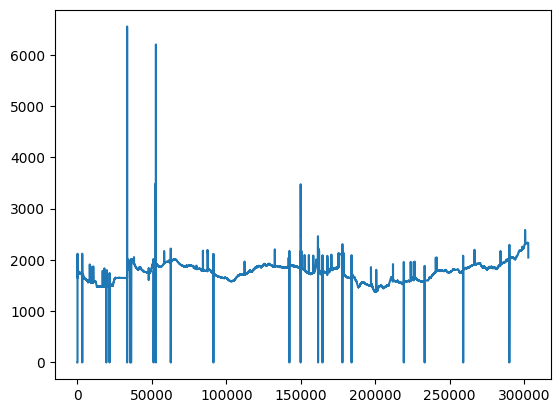

In [132]:
plt.plot(df['Intake Pressure (psi)'])

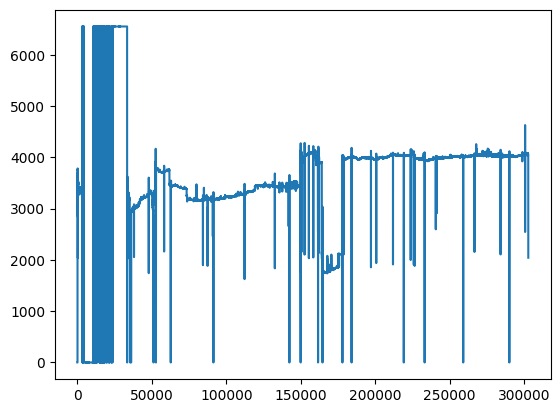

In [133]:
plt.plot(df['Discharge Pressure (psi)'])

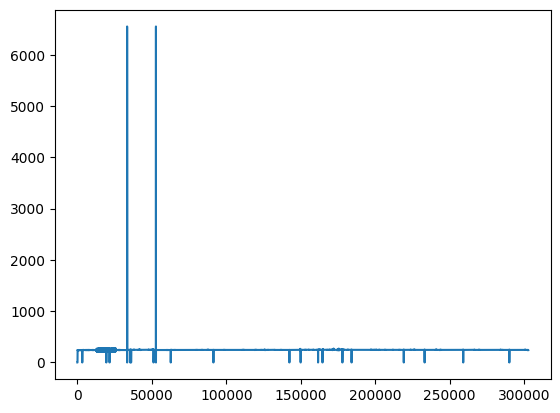

In [134]:
plt.plot(df['Intake Temperature (F)'])

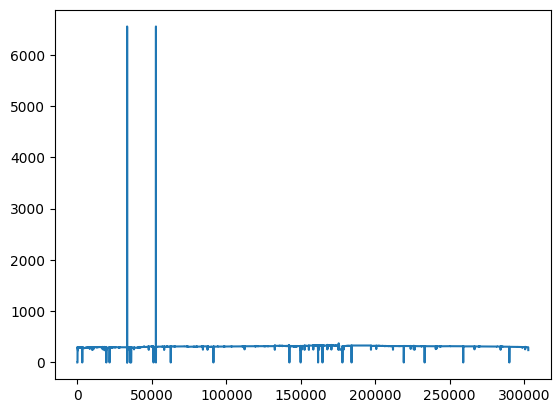

In [135]:
plt.plot(df['Motor Temperature (F)'])

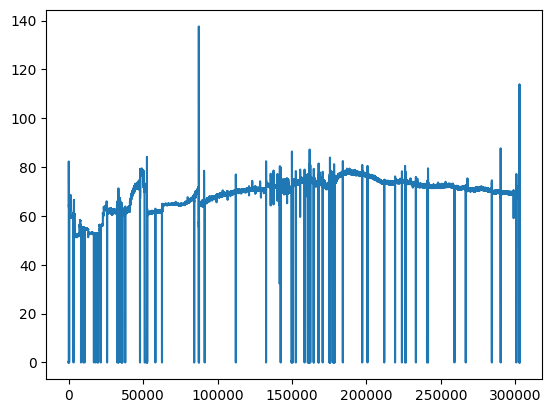

In [136]:
plt.plot(df['Average Amps (A)'])

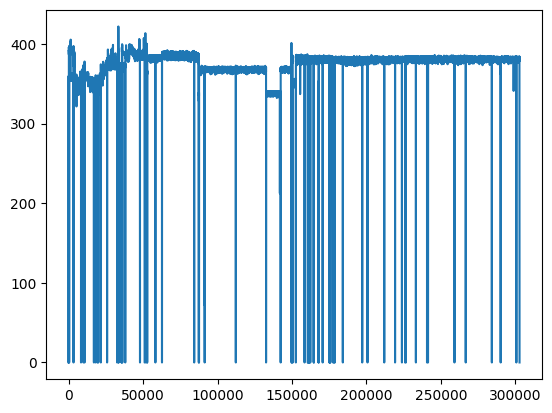

In [137]:
plt.plot(df['Output Voltage (V)'])

# Data Preprocessing 

## Check for missing Data

In [138]:
print(df.isnull().sum().sort_values(ascending=False))

ShutDown                    3137
Shutdown Cause (-)           155
Output Voltage (V)           153
Intake Temperature (F)       152
Drive Frequency (Hz)         146
Intake Pressure (psi)        133
Discharge Pressure (psi)     130
Motor Temperature (F)        124
Average Amps (A)             109
Location                       0
UWI                            0
Reading Time                   0
UTC Offset                     0
dtype: int64


### Delete missing values

In [139]:
df=df.dropna()

In [140]:
print(df.isnull().sum().sort_values(ascending=False))

Location                    0
UWI                         0
Reading Time                0
UTC Offset                  0
Drive Frequency (Hz)        0
Intake Pressure (psi)       0
Discharge Pressure (psi)    0
Intake Temperature (F)      0
Motor Temperature (F)       0
Average Amps (A)            0
Output Voltage (V)          0
Shutdown Cause (-)          0
ShutDown                    0
dtype: int64


### Delete Noisy Data

In [141]:
df=df[(df['Intake Pressure (psi)'] != 6553.5) & (df['Discharge Pressure (psi)'] != 6553.5) & (df['Intake Temperature (F)'] != 6553.5) & (df['Motor Temperature (F)'] != 6553.5) & (df['Average Amps (A)'] != 6553.5) &  (df['Output Voltage (V)'] != 6553.5) ]

In [142]:
df=df[(df['Intake Pressure (psi)'] != 0)&(df['Discharge Pressure (psi)'] != 0) & (df['Intake Temperature (F)'] !=0) & (df['Motor Temperature (F)'] !=0) & (df['Average Amps (A)'] !=0) &  (df['Output Voltage (V)'] !=0)]

In [143]:
df

,Location,UWI,Reading Time,UTC Offset,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Shutdown Cause (-),ShutDown
78,EMERY DEEP-1,EMERY DEEP-1,6/17/2014 2:03,Egypt Time (UTC + 3:00),50.0,1843.2,3565.0,223.7,264.7,76.6,333.5,33181.0,Manual Off
79,EMERY DEEP-1,EMERY DEEP-1,6/17/2014 2:03,Egypt Time (UTC + 3:00),50.0,1842.1,3625.0,223.7,268.2,76.6,338.5,33181.0,Manual Off
80,EMERY DEEP-1,EMERY DEEP-1,6/17/2014 2:04,Egypt Time (UTC + 3:00),50.0,1841.2,3677.2,223.7,270.3,76.8,334.6,33181.0,Manual Off
88,EMERY DEEP-1,EMERY DEEP-1,6/17/2014 2:36,Egypt Time (UTC + 3:00),50.0,2055.1,2144.4,226.8,239.2,82.3,382.1,33181.0,Manual Off
89,EMERY DEEP-1,EMERY DEEP-1,6/17/2014 2:39,Egypt Time (UTC + 3:00),50.0,2012.9,2255.4,226.4,253.2,78.1,385.2,33181.0,Manual Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302819,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 8:00,Egypt Time (UTC + 2:00),45.0,2329.5,4059.9,244.8,297.3,59.0,343.3,33084.0,VSD Overload-Lockout
302820,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 8:03,Egypt Time (UTC + 2:00),48.0,2329.5,4059.9,244.8,297.3,69.0,366.2,33084.0,VSD Overload-Lockout
302821,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 8:05,Egypt Time (UTC + 2:00),49.0,2329.5,4059.9,244.8,297.3,70.0,371.2,33084.0,VSD Overload-Lockout
302822,EMERY DEEP-1,EMERY DEEP-1,10/3/2019 8:06,Egypt Time (UTC + 2:00),49.0,2329.5,4059.9,244.8,297.3,70.0,373.1,33084.0,VSD Overload-Lockout


# Feature Engineering & Feature Selection

#### Drop unnecessary Columens

In [144]:
df=df.drop('Location',axis=1)
df=df.drop('UWI',axis=1)
df=df.drop('UTC Offset',axis=1)
df=df.drop('Shutdown Cause (-)',axis=1)
df=df.drop('ShutDown',axis=1)

In [145]:
df.set_index('Reading Time')

,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V)
Reading Time,,,,,,,
6/17/2014 2:03,50.0,1843.2,3565.0,223.7,264.7,76.6,333.5
6/17/2014 2:03,50.0,1842.1,3625.0,223.7,268.2,76.6,338.5
6/17/2014 2:04,50.0,1841.2,3677.2,223.7,270.3,76.8,334.6
6/17/2014 2:36,50.0,2055.1,2144.4,226.8,239.2,82.3,382.1
6/17/2014 2:39,50.0,2012.9,2255.4,226.4,253.2,78.1,385.2
...,...,...,...,...,...,...,...
10/3/2019 8:00,45.0,2329.5,4059.9,244.8,297.3,59.0,343.3
10/3/2019 8:03,48.0,2329.5,4059.9,244.8,297.3,69.0,366.2
10/3/2019 8:05,49.0,2329.5,4059.9,244.8,297.3,70.0,371.2


# Create pattern for the shutdown status

In [146]:
df['Pressure Difference']=df['Discharge Pressure (psi)']-df['Intake Pressure (psi)']

In [147]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference
78,6/17/2014 2:03,50.0,1843.2,3565.0,223.7,264.7,76.6,333.5,1721.8
79,6/17/2014 2:03,50.0,1842.1,3625.0,223.7,268.2,76.6,338.5,1782.9
80,6/17/2014 2:04,50.0,1841.2,3677.2,223.7,270.3,76.8,334.6,1836.0
88,6/17/2014 2:36,50.0,2055.1,2144.4,226.8,239.2,82.3,382.1,89.3
89,6/17/2014 2:39,50.0,2012.9,2255.4,226.4,253.2,78.1,385.2,242.5
...,...,...,...,...,...,...,...,...,...
302819,10/3/2019 8:00,45.0,2329.5,4059.9,244.8,297.3,59.0,343.3,1730.4
302820,10/3/2019 8:03,48.0,2329.5,4059.9,244.8,297.3,69.0,366.2,1730.4
302821,10/3/2019 8:05,49.0,2329.5,4059.9,244.8,297.3,70.0,371.2,1730.4
302822,10/3/2019 8:06,49.0,2329.5,4059.9,244.8,297.3,70.0,373.1,1730.4


In [148]:
df.describe()

,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference
count,266347.000000,266347.000000,266347.000000,266347.000000,266347.000000,266347.000000,266347.000000,266347.000000
mean,49.881279,1786.789876,3601.108569,245.106109,314.649145,70.378469,376.280003,1814.318693
std,1.448598,163.955794,534.816006,1.149647,20.184158,6.090244,10.842350,581.064899
min,0.000000,84.200000,64.000000,217.600000,223.500000,0.300000,33.600000,-1415.300000
25%,50.000000,1667.700000,3289.800000,244.800000,310.300000,68.900000,370.200000,1537.900000
50%,50.000000,1805.400000,3903.300000,244.900000,316.400000,71.100000,379.800000,1847.100000
75%,50.000000,1880.900000,4014.600000,245.800000,320.400000,73.400000,381.400000,2245.800000
max,55.000000,5057.300000,6553.400000,271.400000,5696.400000,137.600000,413.400000,5067.000000


In [149]:
df=df[(df['Discharge Pressure (psi)'] != 6553.4)]

In [150]:
delta_P=df[df['Pressure Difference']<=10]

In [151]:
delta_P

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference
3264,7/8/2014 7:42,50.00,2121.5,2113.9,223.5,223.5,0.5,352.4,-7.6
3265,7/8/2014 7:49,50.00,2121.5,2113.9,223.5,223.5,0.3,378.8,-7.6
3266,7/8/2014 7:59,50.00,2121.5,2113.9,223.5,223.5,0.3,397.3,-7.6
3268,7/8/2014 8:06,50.00,2121.5,2113.9,223.5,223.5,0.3,395.2,-7.6
3269,7/8/2014 8:09,50.00,2121.5,2113.9,223.5,223.5,0.4,394.9,-7.6
...,...,...,...,...,...,...,...,...,...
184151,8/25/2017 20:33,50.00,2041.4,2031.1,251.1,251.6,77.3,374.9,-10.3
184152,8/25/2017 20:36,50.00,2041.6,2030.9,250.9,251.4,77.3,374.9,-10.7
184153,8/25/2017 20:45,50.00,2042.0,2031.3,250.7,250.7,77.3,374.9,-10.7
290173,7/24/2019 18:15,9.56,2260.2,2260.5,241.3,242.6,19.4,61.7,0.3


In [152]:
#sns.boxplot(df['Discharge Pressure (psi)'])

In [153]:
#sns.boxplot(df['Motor Temperature (F)'])

In [154]:
percentile25 = df['Motor Temperature (F)'].quantile(0.25)
percentile75 = df['Motor Temperature (F)'].quantile(0.75)

In [155]:
iqr=percentile75-percentile25

In [156]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [157]:
print(upper_limit,lower_limit)

335.54999999999995 295.1500000000001


In [158]:
df = df[df['Motor Temperature (F)'] < upper_limit]

In [159]:
df.describe()

,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference
count,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000
mean,49.881972,1786.783202,3602.312705,245.105429,314.567552,70.375782,376.292298,1815.529503
std,1.448059,163.965754,532.891358,1.149521,10.930119,6.090013,10.828000,579.252968
min,0.000000,1002.400000,64.000000,217.600000,223.500000,0.300000,33.600000,-1415.300000
25%,50.000000,1667.600000,3290.700000,244.800000,310.300000,68.900000,370.200000,1538.200000
50%,50.000000,1805.400000,3903.800000,244.900000,316.400000,71.100000,379.800000,1848.100000
75%,50.000000,1880.900000,4014.600000,245.800000,320.400000,73.400000,381.400000,2246.000000
max,55.000000,5057.300000,6515.200000,271.400000,335.500000,137.600000,413.400000,5035.300000


In [160]:
df['shutdown_status']=np.where(df['Pressure Difference'] >= 10,'running','shutdown')

In [161]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference,shutdown_status
78,6/17/2014 2:03,50.0,1843.2,3565.0,223.7,264.7,76.6,333.5,1721.8,running
79,6/17/2014 2:03,50.0,1842.1,3625.0,223.7,268.2,76.6,338.5,1782.9,running
80,6/17/2014 2:04,50.0,1841.2,3677.2,223.7,270.3,76.8,334.6,1836.0,running
88,6/17/2014 2:36,50.0,2055.1,2144.4,226.8,239.2,82.3,382.1,89.3,running
89,6/17/2014 2:39,50.0,2012.9,2255.4,226.4,253.2,78.1,385.2,242.5,running
...,...,...,...,...,...,...,...,...,...,...
302819,10/3/2019 8:00,45.0,2329.5,4059.9,244.8,297.3,59.0,343.3,1730.4,running
302820,10/3/2019 8:03,48.0,2329.5,4059.9,244.8,297.3,69.0,366.2,1730.4,running
302821,10/3/2019 8:05,49.0,2329.5,4059.9,244.8,297.3,70.0,371.2,1730.4,running
302822,10/3/2019 8:06,49.0,2329.5,4059.9,244.8,297.3,70.0,373.1,1730.4,running


In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
df['shutdown_status'] = label_encoder.fit_transform(df['shutdown_status'])

In [163]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),Pressure Difference,shutdown_status
78,6/17/2014 2:03,50.0,1843.2,3565.0,223.7,264.7,76.6,333.5,1721.8,0
79,6/17/2014 2:03,50.0,1842.1,3625.0,223.7,268.2,76.6,338.5,1782.9,0
80,6/17/2014 2:04,50.0,1841.2,3677.2,223.7,270.3,76.8,334.6,1836.0,0
88,6/17/2014 2:36,50.0,2055.1,2144.4,226.8,239.2,82.3,382.1,89.3,0
89,6/17/2014 2:39,50.0,2012.9,2255.4,226.4,253.2,78.1,385.2,242.5,0
...,...,...,...,...,...,...,...,...,...,...
302819,10/3/2019 8:00,45.0,2329.5,4059.9,244.8,297.3,59.0,343.3,1730.4,0
302820,10/3/2019 8:03,48.0,2329.5,4059.9,244.8,297.3,69.0,366.2,1730.4,0
302821,10/3/2019 8:05,49.0,2329.5,4059.9,244.8,297.3,70.0,371.2,1730.4,0
302822,10/3/2019 8:06,49.0,2329.5,4059.9,244.8,297.3,70.0,373.1,1730.4,0


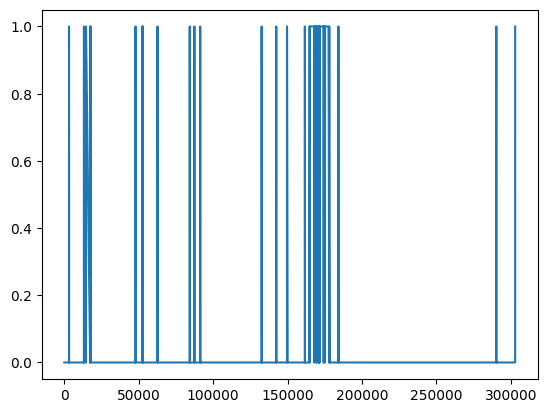

In [164]:
plt.plot(df['shutdown_status'])

In [165]:
df=df.drop('Pressure Difference',axis=1)

In [166]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),shutdown_status
78,6/17/2014 2:03,50.0,1843.2,3565.0,223.7,264.7,76.6,333.5,0
79,6/17/2014 2:03,50.0,1842.1,3625.0,223.7,268.2,76.6,338.5,0
80,6/17/2014 2:04,50.0,1841.2,3677.2,223.7,270.3,76.8,334.6,0
88,6/17/2014 2:36,50.0,2055.1,2144.4,226.8,239.2,82.3,382.1,0
89,6/17/2014 2:39,50.0,2012.9,2255.4,226.4,253.2,78.1,385.2,0
...,...,...,...,...,...,...,...,...,...
302819,10/3/2019 8:00,45.0,2329.5,4059.9,244.8,297.3,59.0,343.3,0
302820,10/3/2019 8:03,48.0,2329.5,4059.9,244.8,297.3,69.0,366.2,0
302821,10/3/2019 8:05,49.0,2329.5,4059.9,244.8,297.3,70.0,371.2,0
302822,10/3/2019 8:06,49.0,2329.5,4059.9,244.8,297.3,70.0,373.1,0


<AxesSubplot: xlabel='shutdown_status', ylabel='count'>

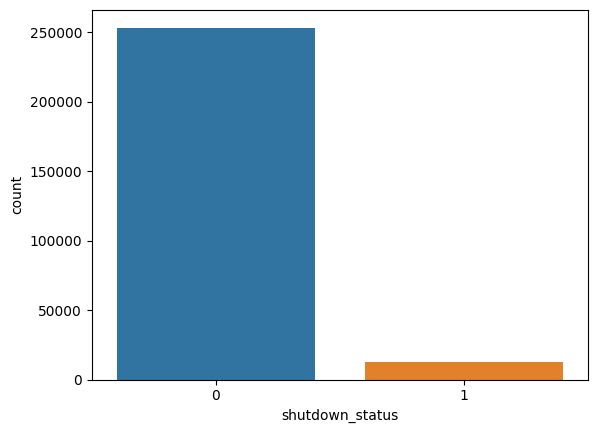

In [167]:
sns.countplot(x='shutdown_status', data=df)

In [168]:
df.groupby(["shutdown_status"]).count()  # look at the class distribution 

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V)
shutdown_status,,,,,,,,
0,253450,253450,253450,253450,253450,253450,253450,253450
1,12690,12690,12690,12690,12690,12690,12690,12690


In [169]:
df.describe()

,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),shutdown_status
count,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000,266140.000000
mean,49.881972,1786.783202,3602.312705,245.105429,314.567552,70.375782,376.292298,0.047682
std,1.448059,163.965754,532.891358,1.149521,10.930119,6.090013,10.828000,0.213092
min,0.000000,1002.400000,64.000000,217.600000,223.500000,0.300000,33.600000,0.000000
25%,50.000000,1667.600000,3290.700000,244.800000,310.300000,68.900000,370.200000,0.000000
50%,50.000000,1805.400000,3903.800000,244.900000,316.400000,71.100000,379.800000,0.000000
75%,50.000000,1880.900000,4014.600000,245.800000,320.400000,73.400000,381.400000,0.000000
max,55.000000,5057.300000,6515.200000,271.400000,335.500000,137.600000,413.400000,1.000000


In [170]:
#half=int(0.9*len(df))

# Down Sampling the larger class

In [171]:
zeros_indices=df[df['shutdown_status']==0].index  # Get the record numbers of running status

In [172]:
zeros=len(df[df['shutdown_status']==0]) # how many running records

In [173]:
ones_indices=df[df['shutdown_status']==1].index  # Get the record numbers of shutdown status

In [174]:
ones=len(df[df['shutdown_status']==1]) # how many shutdown records

In [175]:
random_indices = np.random.choice( zeros_indices, zeros - 231000 , replace=False)    #Randomly pick up 200 zeros indices

In [176]:
down_sample_indices = np.concatenate([ones_indices,random_indices])  # combine  zeros indices with ones indices

In [177]:
data_down_sample = df.loc[down_sample_indices]  # Extract all those records for ones and zeros to create new dataset

In [178]:
data_down_sample.groupby(["shutdown_status"]).count()  # look at the class distribution after downsample

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V)
shutdown_status,,,,,,,,
0,22450,22450,22450,22450,22450,22450,22450,22450
1,12690,12690,12690,12690,12690,12690,12690,12690


In [179]:
df=data_down_sample

In [180]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),shutdown_status
3264,7/8/2014 7:42,50.0,2121.5,2113.9,223.5,223.5,0.5,352.4,1
3265,7/8/2014 7:49,50.0,2121.5,2113.9,223.5,223.5,0.3,378.8,1
3266,7/8/2014 7:59,50.0,2121.5,2113.9,223.5,223.5,0.3,397.3,1
3268,7/8/2014 8:06,50.0,2121.5,2113.9,223.5,223.5,0.3,395.2,1
3269,7/8/2014 8:09,50.0,2121.5,2113.9,223.5,223.5,0.4,394.9,1
...,...,...,...,...,...,...,...,...,...
124702,10/7/2016 16:44,48.0,1893.1,3452.8,244.8,318.4,71.1,368.4,0
194260,11/8/2017 11:05,50.0,1522.8,3988.9,246.2,330.8,77.6,379.3,0
251161,11/24/2018 3:25,50.0,1779.4,4006.0,244.9,317.3,71.9,382.3,0
113578,8/30/2016 19:39,48.0,1739.8,3313.6,244.8,317.8,70.4,367.7,0


In [181]:
df=df.reset_index(drop=True)

In [182]:
df

,Reading Time,Drive Frequency (Hz),Intake Pressure (psi),Discharge Pressure (psi),Intake Temperature (F),Motor Temperature (F),Average Amps (A),Output Voltage (V),shutdown_status
0,7/8/2014 7:42,50.0,2121.5,2113.9,223.5,223.5,0.5,352.4,1
1,7/8/2014 7:49,50.0,2121.5,2113.9,223.5,223.5,0.3,378.8,1
2,7/8/2014 7:59,50.0,2121.5,2113.9,223.5,223.5,0.3,397.3,1
3,7/8/2014 8:06,50.0,2121.5,2113.9,223.5,223.5,0.3,395.2,1
4,7/8/2014 8:09,50.0,2121.5,2113.9,223.5,223.5,0.4,394.9,1
...,...,...,...,...,...,...,...,...,...
35135,10/7/2016 16:44,48.0,1893.1,3452.8,244.8,318.4,71.1,368.4,0
35136,11/8/2017 11:05,50.0,1522.8,3988.9,246.2,330.8,77.6,379.3,0
35137,11/24/2018 3:25,50.0,1779.4,4006.0,244.9,317.3,71.9,382.3,0
35138,8/30/2016 19:39,48.0,1739.8,3313.6,244.8,317.8,70.4,367.7,0


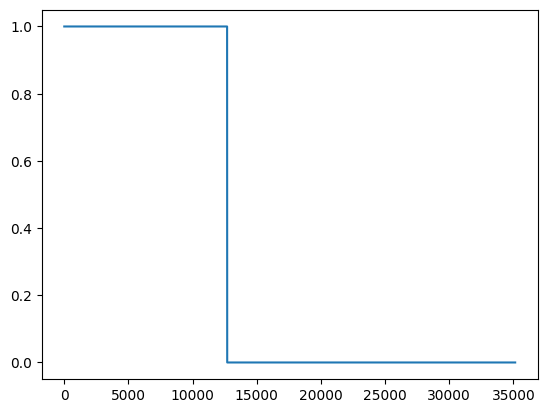

In [183]:
plt.plot(df['shutdown_status'])

<AxesSubplot: xlabel='shutdown_status', ylabel='count'>

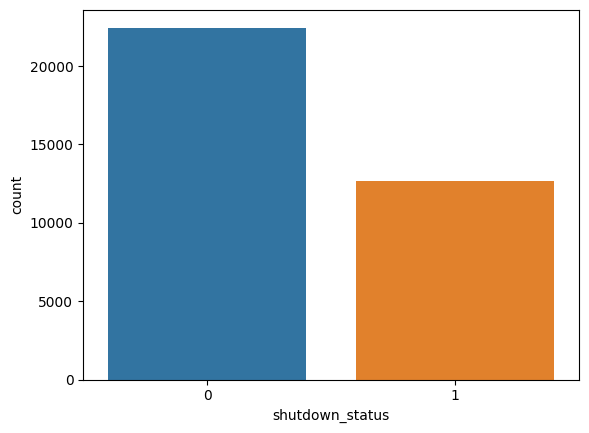

In [184]:
sns.countplot(x='shutdown_status', data=df)

# Spiliting data to Trainning and Testing 

In [185]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [186]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.3, random_state=42,shuffle=True)

In [187]:
X_train.shape

(24598, 7)

In [188]:
X_test.shape

(10542, 7)

# Data Normalization

In [60]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Algorithems Definition

In [62]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(gamma='auto', kernel='rbf', probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=100)
tree_clf = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score of of model {clf} is : {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score of model {clf} is : {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")

In [64]:
model_list=[logreg,svm,knn,rf_clf,tree_clf,gnb]

In [65]:
def select_best_model():
    for model in model_list:
        model.fit(X_train,y_train)
        print_score(model, X_train, y_train, X_test, y_test, train=True)
        print_score(model, X_train, y_train, X_test, y_test, train=False)  

In [66]:
select_best_model()

Train Result:
Accuracy Score of of model LogisticRegression(random_state=42, solver='liblinear') is : 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999364     0.996734  0.998415      0.998049      0.998417
recall         0.998157     0.998871  0.998415      0.998514      0.998415
f1-score       0.998760     0.997802  0.998415      0.998281      0.998415
support    15737.000000  8861.000000  0.998415  24598.000000  24598.000000
_______________________________________________
Confusion Matrix: 
 [[15708    29]
 [   10  8851]]

Test Result:
Accuracy Score of model LogisticRegression(random_state=42, solver='liblinear') is : 99.83%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.999552     0.996095  0.998293      0.997824      0.998296
recall        0.99776

# Gride Search Cross Validation

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       splitter='random')

In [68]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score of of model DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       splitter='random') is : 99.93%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999682     0.998647  0.999309      0.999164      0.999309
recall         0.999237     0.999436  0.999309      0.999337      0.999309
f1-score       0.999460     0.999041  0.999309      0.999250      0.999309
support    15737.000000  8861.000000  0.999309  24598.000000  24598.000000
_______________________________________________
Confusion Matrix: 
 [[15725    12]
 [    5  8856]]

Test Result:
Accuracy Score of model DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       splitter='random') is : 99.95%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accura

# Pruned Decision Tree

In [69]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.00000000e+00 4.65585425e-05 7.12187251e-05 1.74136877e-04
 2.51038759e-04 3.53395184e-04 3.74128727e-04 7.03582910e-04
 1.21841581e-03 4.79217468e-03 9.28615758e-01]
[8.58294561e-04 9.04853104e-04 9.76071829e-04 1.15020871e-03
 1.65228622e-03 2.00568141e-03 2.75393886e-03 3.45752177e-03
 4.67593759e-03 1.42602869e-02 9.42876045e-01]


In [70]:
from sklearn import tree

In [71]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

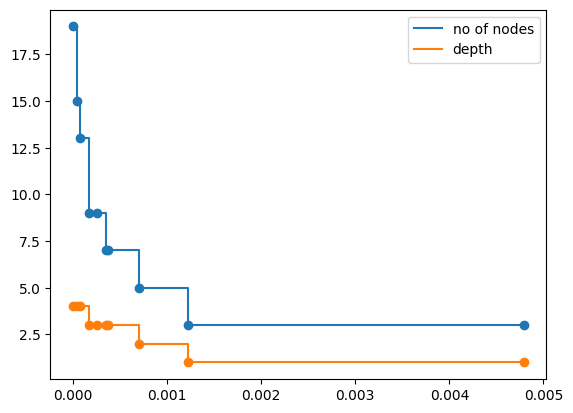

In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

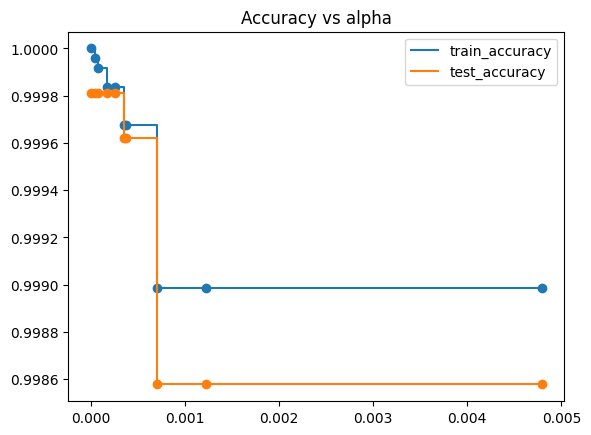

In [73]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [74]:
classes = [0,1]

In [75]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.998983657207903
Test score 0.9985771200910644
Train Confusion matrix


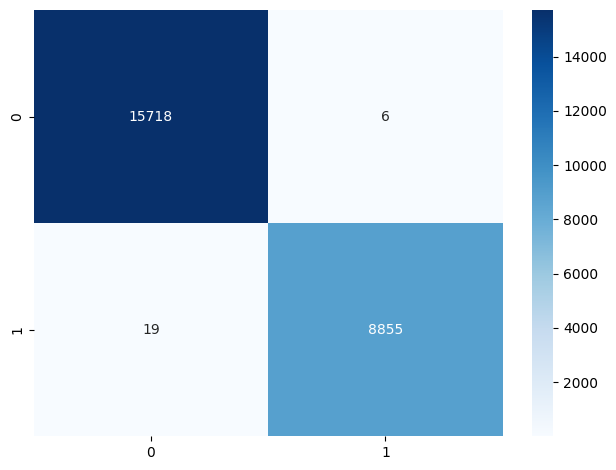

Test Confusion matrix


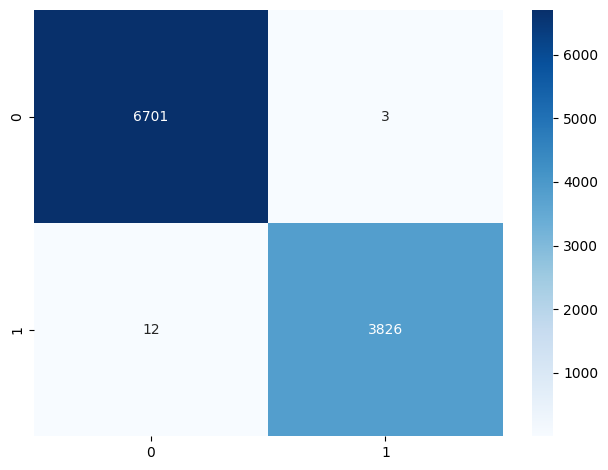

In [76]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0016)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# Usnig Principal Component Analysis

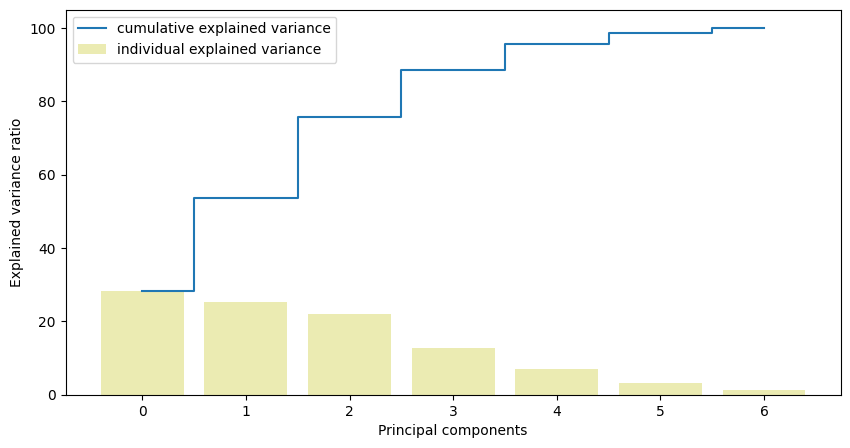

In [82]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

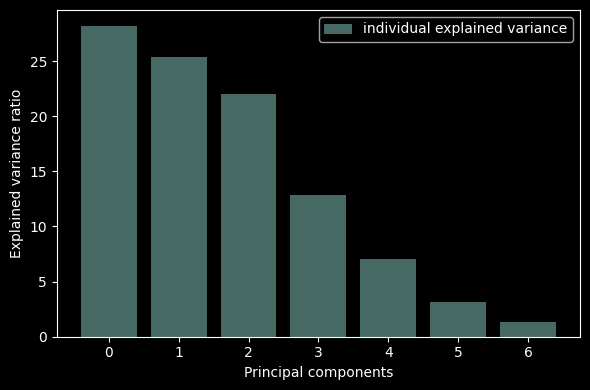

In [83]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [84]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test= pca.fit_transform(X_test)

In [85]:
# Select best modle after appling PCA

In [86]:
select_best_model()

Train Result:
Accuracy Score of of model LogisticRegression(random_state=42, solver='liblinear') is : 99.85%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999555     0.996511  0.998455      0.998033      0.998458
recall         0.998030     0.999210  0.998455      0.998620      0.998455
f1-score       0.998792     0.997859  0.998455      0.998325      0.998456
support    15737.000000  8861.000000  0.998455  24598.000000  24598.000000
_______________________________________________
Confusion Matrix: 
 [[15706    31]
 [    7  8854]]

Test Result:
Accuracy Score of model LogisticRegression(random_state=42, solver='liblinear') is : 99.83%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.999552     0.996095  0.998293      0.997824      0.998296
recall        0.99776

# Using PCA with Gride search 

# With Random Forrest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=10, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/moussa/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/moussa/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/moussa/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False})


/home/moussa/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score of of model RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto',
                       min_samples_leaf=2, n_estimators=600) is : 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    15737.0  8861.0       1.0    24598.0       24598.0
_______________________________________________
Confusion Matrix: 
 [[15737     0]
 [    0  8861]]

Test Result:
Accuracy Score of model RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto',
                       min_samples_leaf=2, n_estimators=600) is : 99.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg


# With Decesion Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [194]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score of of model DecisionTreeClassifier(max_depth=3, min_samples_leaf=5) is : 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999936     0.999887  0.999919      0.999912      0.999919
recall         0.999936     0.999887  0.999919      0.999912      0.999919
f1-score       0.999936     0.999887  0.999919      0.999912      0.999919
support    15737.000000  8861.000000  0.999919  24598.000000  24598.000000
_______________________________________________
Confusion Matrix: 
 [[15736     1]
 [    1  8860]]

Test Result:
Accuracy Score of model DecisionTreeClassifier(max_depth=3, min_samples_leaf=5) is : 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.999851     0.999739   0.99981      0.999795       0.99981
recall        0.99985

# SVM with Grade Search & PCA

In [189]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

param_grid = [
  #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, # Ran too slowly with these
  {'kernel':['linear']},
  {'kernel':['rbf'], 'gamma':[0.001, 0.0001]}
]

estimator = SVC(C=1)
svm_cv = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1)

In [190]:
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best paramters: {best_params})")

svm_cv = SVC(**best_params)
svm_cv.fit(X_train, y_train)


Best paramters: {'kernel': 'linear'})


SVC(kernel='linear')

In [191]:
print_score(svm_cv, X_train, y_train, X_test, y_test, train=True)
print_score(svm_cv, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score of of model SVC(kernel='linear') is : 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    15737.0  8861.0       1.0    24598.0       24598.0
_______________________________________________
Confusion Matrix: 
 [[15737     0]
 [    0  8861]]

Test Result:
Accuracy Score of model SVC(kernel='linear') is : 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    6713.0  3829.0       1.0    10542.0       10542

# Using Two PCA with SVM and KNN

In [118]:
svm = SVC(gamma='auto', kernel='linear', probability=True)

Accuracy with SVM considering only first 2PC: 99.85%


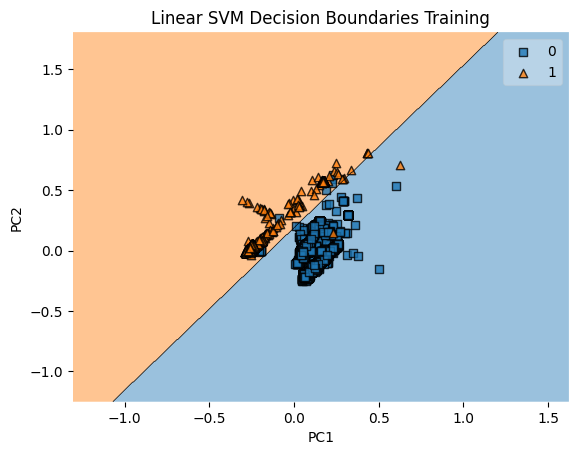

In [119]:
from sklearn import metrics
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

svm.fit(X_train2D, y_train) 
test_predictions = svm.predict(X_test2D)
precision = metrics.accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=svm, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Linear SVM Decision Boundaries Training')
plt.show()

In [120]:
cf_matrix = confusion_matrix(y_test,test_predictions)
print(cf_matrix)

[[6698   15]
 [   1 3828]]


In [121]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9987521823872532

Text(0.5, 0, 'False Positive Rate')

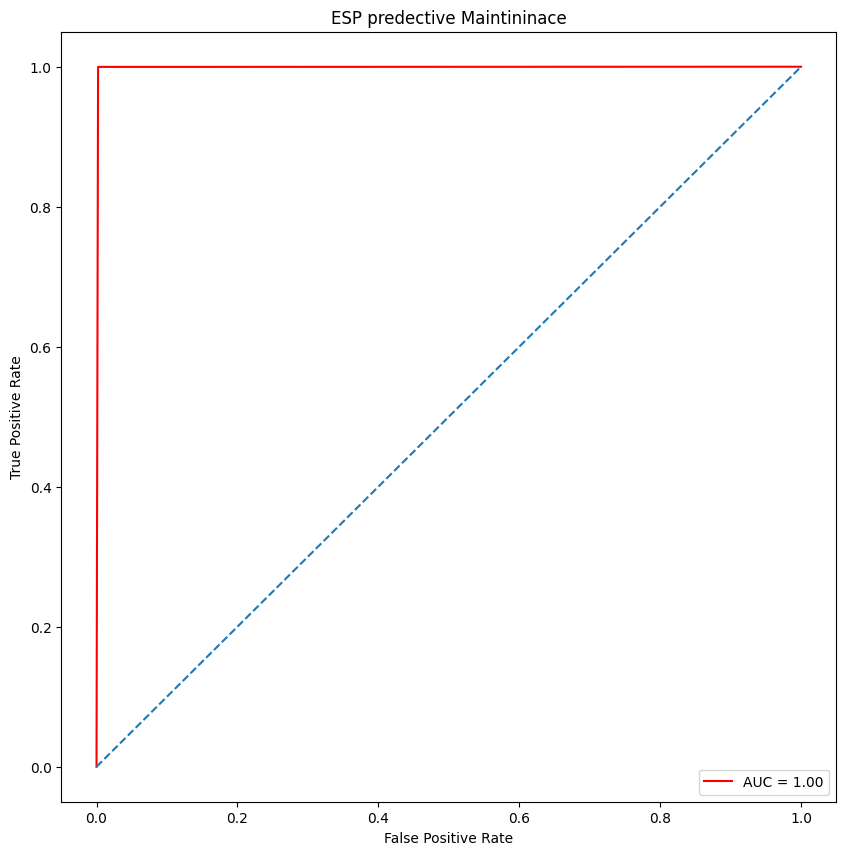

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ESP predective Maintininace')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

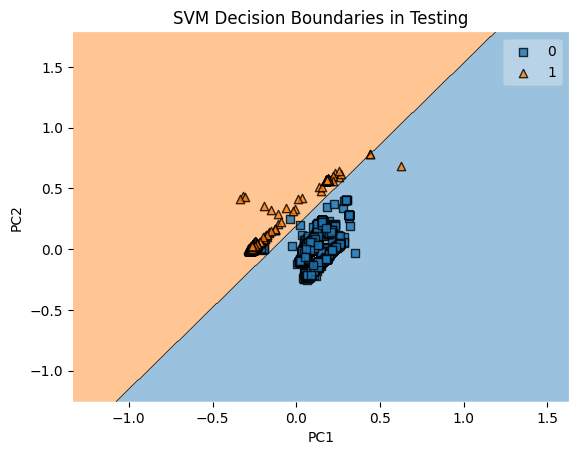

In [123]:
#Plotting decision boundaries
plot_decision_regions(X_test2D, y_test, clf=svm, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM Decision Boundaries in Testing')
plt.show()

Accuracy with K-NN considering only first 2PC: 99.97%


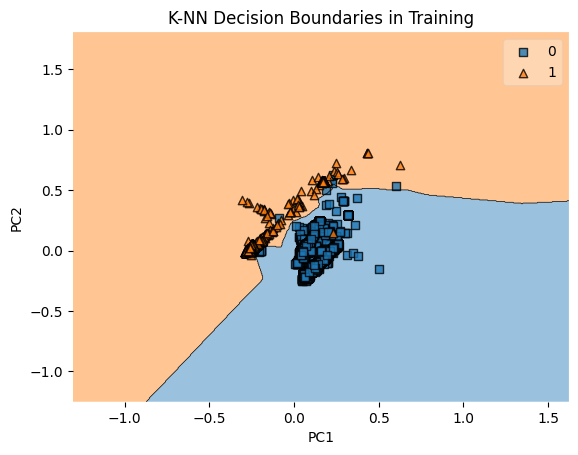

In [124]:
#K-NN + PCA
knn_pca=knn.fit(X_train2D, y_train)
y_pred = knn_pca.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=knn, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-NN Decision Boundaries in Training')
plt.show()

In [125]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[6711    2]
 [   1 3828]]


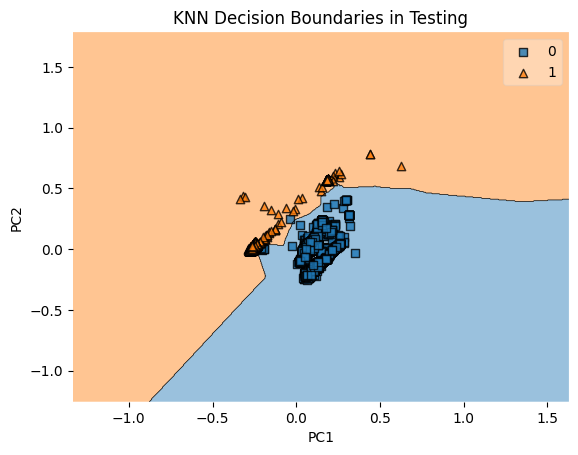

In [126]:
#Plotting decision boundaries
plot_decision_regions(X_test2D, y_test, clf=knn, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KNN Decision Boundaries in Testing')
plt.show()